## Import Package

In [116]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Load Dataset

In [82]:
boston = pd.read_csv('boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Check Statistics Descriptive Data

In [83]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Most coloms have a skew distribution

In [84]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Nothing missing value in dataset

# Explore Data

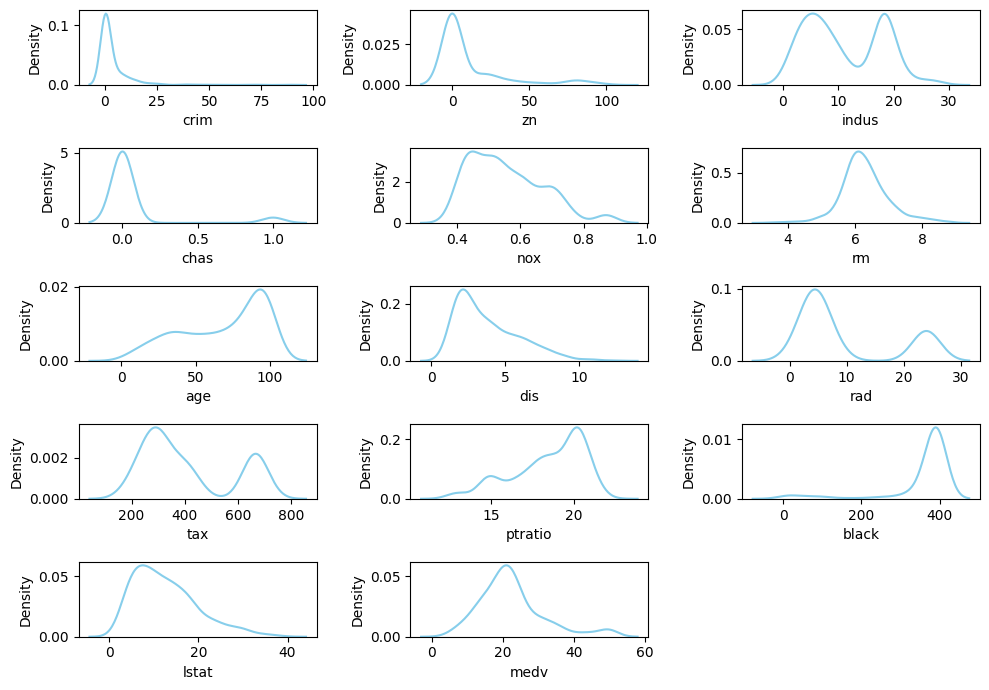

In [85]:
# adjust the figure size for better readability
plt.figure(figsize=(10,7))
numerical = [col for col in boston.columns]
features = numerical
for i in range(0, len(features)):
    plt.subplot(5, len(features) // 5 + (len(features) % 5 > 0), i+1)  # Mengubah menjadi 3 baris
    sns.kdeplot(x=boston[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

plt.show()

As expected by descriptive statistics, most of the columns have skew distribution, there are some columns that will be transformed.

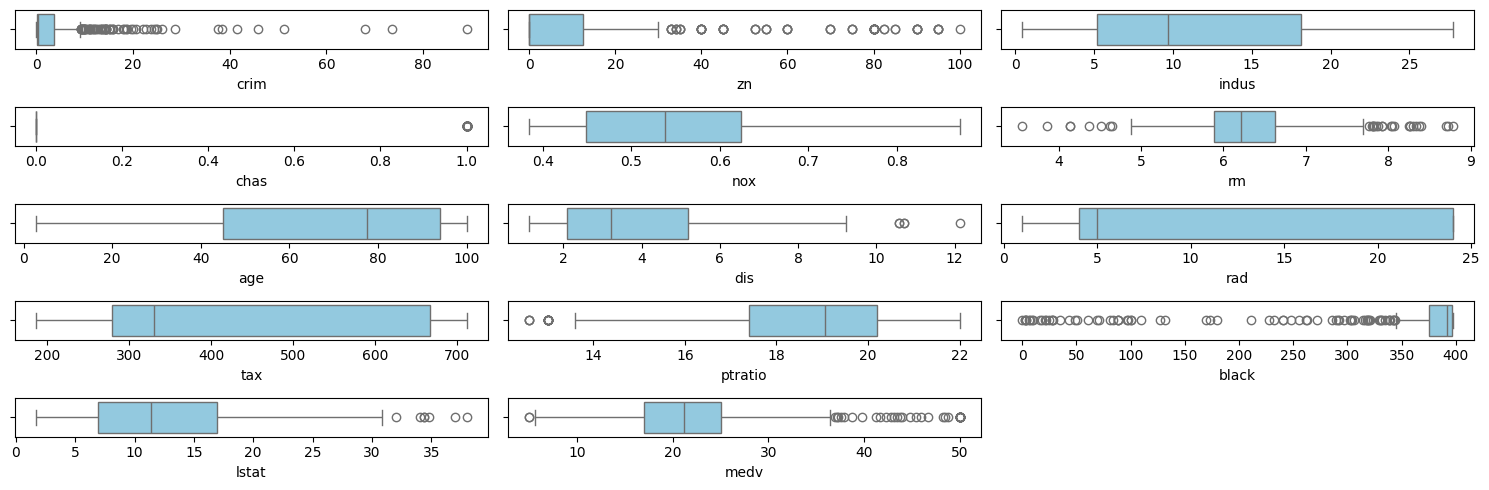

In [86]:
# adjust the figure size for better readability
plt.figure(figsize=(15,5))
numerical = [col for col in boston.columns]
features = numerical
for i in range(0, len(features)):
    plt.subplot(5, len(features) // 5 + (len(features) % 5 > 0), i+1)  # Mengubah menjadi 3 baris
    sns.boxplot(x=boston[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

plt.show()

most columns have outliers, these outliers will be dealt with as the regression model is quite sensitive to outliers.

# Data Preprocessing (20 point)

In [87]:
df = boston.copy()

* remove rows with crim value above 30

In [88]:
df[df['crim'] > 30].shape[0]

8

In [89]:
df = df[df['crim'] <= 30]
df.shape

(498, 14)

* remove rows with zn value above 80

In [90]:
df[df['zn'] > 80].shape[0]

14

In [91]:
df = df[df['zn'] <= 80]
df.shape

(484, 14)

Transformation of the 'black' column using rank transformation.

In [92]:
df['black'] = df['black'].rank()

Transformation colum 'zn' using log transformation

In [93]:
df['zn'] = np.log1p(df['zn'])

### PCA Process

In [94]:
X = df.drop('medv', axis=1)
y = df['medv']

In [95]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_standard = scaler.transform(X)

In [96]:
colom = []
for i in range(1,len(X.columns)+1):
    colom.append(f'pc{i}')

In [97]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(X.columns))
pca.fit(X_standard)
pcs = pca.transform(X_standard)

pdf = pd.DataFrame(data = pcs, columns = colom)
pdf['species'] = y
pdf.head(3)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,species
0,-0.765168,0.014325,-0.170901,0.295120,-0.361212,-0.141373,-0.054784,0.002509,-0.022658,-0.068837,-0.104247,0.045128,0.104909,24.0
1,-0.456826,-0.448365,-0.278337,-0.030074,-0.037975,-0.070756,-0.121425,-0.055974,0.149672,-0.002710,0.086928,0.056860,0.001783,21.6
2,-0.482152,-0.292538,0.041462,-0.174740,0.109057,-0.208770,-0.097178,0.028137,0.065249,0.031964,0.122507,0.015148,0.044931,34.7


In [98]:
print('Explained variance ratio:', pca.explained_variance_ratio_*100)
np.cumsum(pca.explained_variance_ratio_*100)

Explained variance ratio: [48.91270394 13.05287921 10.72337725  7.55769975  6.05130532  3.7553596
  2.94028177  2.32921019  1.30656355  1.16051434  0.80656682  0.71669843
  0.68683981]


array([ 48.91270394,  61.96558315,  72.6889604 ,  80.24666015,
        86.29796547,  90.05332508,  92.99360684,  95.32281703,
        96.62938059,  97.78989493,  98.59646175,  99.31316019,
       100.        ])

In [99]:
colom_use=0
for i in np.cumsum(pca.explained_variance_ratio_*100):
    if i<=91:
        colom_use += 1
colom_use

6

The maximum data information will be taken up to 91% because after analyzing the 7th component onwards, it can be seen that the decrease in information is quite significant. The components are likely to contain noise that is less relevant for analysis, so focusing on the first 6 principal components is expected to provide a fairly good representation of the essential data patterns.

In [100]:
colom_name = []
for i in range(1,colom_use+1):
    colom_name.append(f'pc{i}')
colom_name

['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6']

In [101]:
from sklearn.decomposition import PCA

pca = PCA(n_components=colom_use)
pca.fit(X_standard)
pcs = pca.transform(X_standard)

X_pca = pd.DataFrame(data = pcs, columns = colom_name)
X_pca['species'] = y
X_pca.head(3)

,pc1,pc2,pc3,pc4,pc5,pc6,species
0,-0.765168,0.014325,-0.170901,0.295120,-0.361212,-0.141373,24.0
1,-0.456826,-0.448365,-0.278337,-0.030074,-0.037975,-0.070756,21.6
2,-0.482152,-0.292538,0.041462,-0.174740,0.109057,-0.208770,34.7


In [102]:
print('Explained variance ratio:', pca.explained_variance_ratio_*100)
np.cumsum(pca.explained_variance_ratio_*100)

Explained variance ratio: [48.91270394 13.05287921 10.72337725  7.55769975  6.05130532  3.7553596 ]


array([48.91270394, 61.96558315, 72.6889604 , 80.24666015, 86.29796547,
       90.05332508])

# Regression Model (20 point)

### Model Without PCA

In [122]:
# split train test
from sklearn.model_selection import train_test_split

fitur = X_standard
target = df[['medv']]

# First splitting: pretrain and test
X_train, X_test, y_train, y_test = train_test_split(fitur, target, test_size=0.20, random_state=42)

In [123]:
from sklearn.linear_model import LinearRegression

# define the model
lr = LinearRegression()

# fit the model (training)
lr.fit(X_train, y_train)

LinearRegression()

In [124]:
y_predict_train = lr.predict(X_train)
y_predict = lr.predict(X_test)

In [125]:
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for training data is 4.928911790697029
MAE for training data is 3.544070831097571
MAPE for training data is 0.1762170075537906


In [126]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test, y_predict)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict)))

RMSE for testing data is 3.88442889985863
MAE for testing data is 2.7270806290496363
MAPE for testing data is 0.15468506161641984


### Model With PCA

In [107]:
from sklearn.model_selection import train_test_split

fitur = X_pca.drop('species', axis=1)
target = y

X_train, X_test, y_train, y_test = train_test_split(fitur, target, test_size=0.20, random_state=42)

In [108]:
from sklearn.linear_model import LinearRegression

lr_pca = LinearRegression()
lr_pca.fit(X_train, y_train)

LinearRegression()

In [119]:
y_predict_pca_train = lr_pca.predict(X_train)
y_predict_pca = lr_pca.predict(X_test)

In [118]:
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_pca_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, y_predict_pca_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_pca_train)))

RMSE for training data is 5.7840344791119795
MAE for training data is 4.246711018171542
MAPE for training data is 0.20208574175159053


In [120]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_pca))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test, y_predict_pca)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_pca)))

RMSE for testing data is 4.23243948313172
MAE for testing data is 3.351136180896219
MAPE for testing data is 0.18784084673601734


## Evaluasi (20)

In [127]:
from sklearn.metrics import mean_squared_error
evaluation = {
    'Model':['No pca', 'PCA'],
    'RMSE_train':[np.sqrt(mean_squared_error(y_train, y_predict_train)),np.sqrt(mean_squared_error(y_train, y_predict_pca_train))],
    'RMSE_test':[np.sqrt(mean_squared_error(y_test, y_predict)),np.sqrt(mean_squared_error(y_test, y_predict_pca))],
    'MAE_train':[mean_absolute_error(y_train, y_predict_train), mean_absolute_error(y_train, y_predict_pca_train)],
    'MAE_test':[mean_absolute_error(y_test, y_predict), mean_absolute_error(y_test, y_predict_pca)],    
    'MAPE_train':[mean_absolute_percentage_error(y_train, y_predict_train),mean_absolute_percentage_error(y_train, y_predict_pca_train)],
    'MAPE_test':[mean_absolute_percentage_error(y_test, y_predict),mean_absolute_percentage_error(y_test, y_predict_pca)],
}
evaluation = pd.DataFrame(evaluation)
evaluation

,Model,RMSE_train,RMSE_test,MAE_train,MAE_test,MAPE_train,MAPE_test
0,No pca,4.928912,3.884429,3.544071,2.727081,0.176217,0.154685
1,PCA,5.784034,4.232439,4.246711,3.351136,0.202086,0.187841


The model without PCA is better than the model with PCA because the PCA process removes components with low contribution, which turn out to have important information for more accurate prediction. Thus, the model without PCA is considered more effective in utilizing the existing information for prediction purposes, especially as seen from the better RMSE, MAE and MAPE evaluation results.